# TABLE OF CONTENTS
-[INTRODUCTION](#introduction)
-[DATA COLLECTION](#data-collection)
-[DATA WRANGLING](#data-wrangling)
    -[DATA WRANGLING PHASE REPORT](#data-wrangling-phase-report)
-[DATA ANALYSIS](#data-analysis)
-[CONCLUSION](#conclusion)

# INTRODUCTION
The TMDb (The Movie Database) dataset is a collection of movie-related data that includes information about movies, TV shows, and associated metadata. TMDb is a popular online database that provides information about various aspects of movies and TV shows, such as titles, release dates, genres, cast and crew, posters, trailers, ratings, and more.

In this project, I will investigate the dataset using python in a notebook with the popular libraries i.e. Pandas, numpy and seaborn to answer the following set of both univariate and bivariate questions.
#### Single Variable (1D) Questions:
    1. Which year had the highest release of movies?
    2. Which genre had the highest release of movies?
    3. Which 10 actors are casted the most?
    4. Identify the keywords that appear most frequently in movie descriptions.
    5. Calculate the average popularity for each genre category.
    6. Calculate the total revenue for each genre category.
    7. Calculate the average vote average for movies released before the year 2000.
    8. Perform a time series analysis of movie releases and visualize the trend over the years.
#### Multivariable (2D…) Questions:
1. Which length (runtime) is suits viewers most based on movie popularity?
2. What is the correlation between movies’ budgets and their revenue?
3. What is the correlation between average ratings and revenue generated?

### IMPORTING OUR LIBRARIES 
In this section we import all the necessary libraries that we are going to be using in our environment.


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
plt.style.use('ggplot')
%matplotlib inline

## DATA COLLECTION 
In theis section we load our data into the environment using the pandas library and declare it as Raw_data

In [181]:
Raw_data = pd.read_csv('data.csv')

## DATA WRANGLING 
"Data wrangling" refers to the process of cleaning, transforming, and organizing raw data into a structured format suitable for analysis. In this context,I deal with missing values, converting data types, handling duplicates, and preparing the data for analysis.

In [182]:
Raw_data.shape

(10866, 21)

In [183]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [184]:
Raw_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [185]:
Raw_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [186]:
Raw_data.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [187]:
Raw_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [188]:
Raw_data.duplicated().sum()

1

#### DATA WRANGLING PHASE REPORT.
- The dataset has 10,866 rows and 21 columns.
- All values, even when innapropriate, are either of three data types: int64, float64 and object.
- The dataset contains 1 row that is a duplicate across all columns.

## DATA CLEANING
In this section i prepare the data for analysis by dealing with duplicate values, missing values and
rows that won't be necessary for my investigations.

In [189]:
# dropping duplicates
data = Raw_data.copy()
data.drop_duplicates(subset = 'imdb_id',keep = False , inplace = True)
data.shape
data.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [190]:
# dropping columns
columns_to_drop = ['original_title','homepage','tagline','overview','production_companies','vote_count',
'budget_adj', 'revenue_adj']
data.drop(columns= columns_to_drop , inplace = True)


In [191]:
data.head(1)

,id,imdb_id,popularity,budget,revenue,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015


In [192]:
round(data.isnull().sum().sort_values(ascending= False)/len(data) * 100 , 2)

keywords        13.70
cast             0.70
director         0.37
genres           0.19
id               0.00
imdb_id          0.00
popularity       0.00
budget           0.00
revenue          0.00
runtime          0.00
release_date     0.00
vote_average     0.00
release_year     0.00
dtype: float64

We can see that the percentage number of missing values are from the keywords column.

In [193]:
data.dropna(inplace = True)
data.shape

(9302, 13)

## DATA ANALYSIS

#### Which year had the highest release of movies

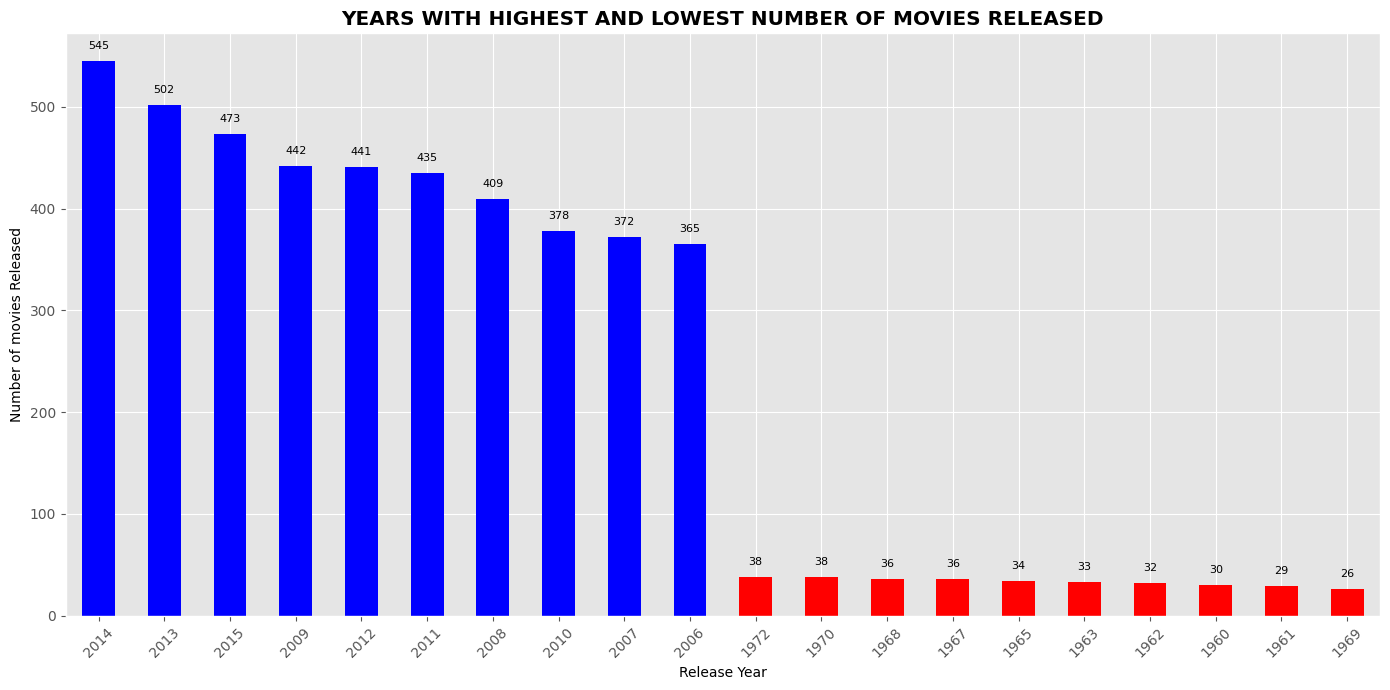

In [194]:
movies_released_per_year = data.groupby('release_year').count()['id'].sort_values(ascending= False)
seriess= pd.concat([movies_released_per_year.iloc[:10],movies_released_per_year.iloc[-10:]])
plt.figure(figsize=(14,7))
ax = seriess.plot(kind ='bar', color = ['blue']*10+['red']*10,)
for index,value in enumerate(seriess):
    ax.text(index, value+10 ,str(value),ha ='center',va = 'bottom', fontsize = 8)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of movies Released')
ax.set_title('YEARS WITH HIGHEST AND LOWEST NUMBER OF MOVIES RELEASED',weight = 'bold')
ax.set_xticklabels(seriess.index,rotation = 45)
plt.tight_layout()
plt.show()

#### Which genre had the highest release of movies

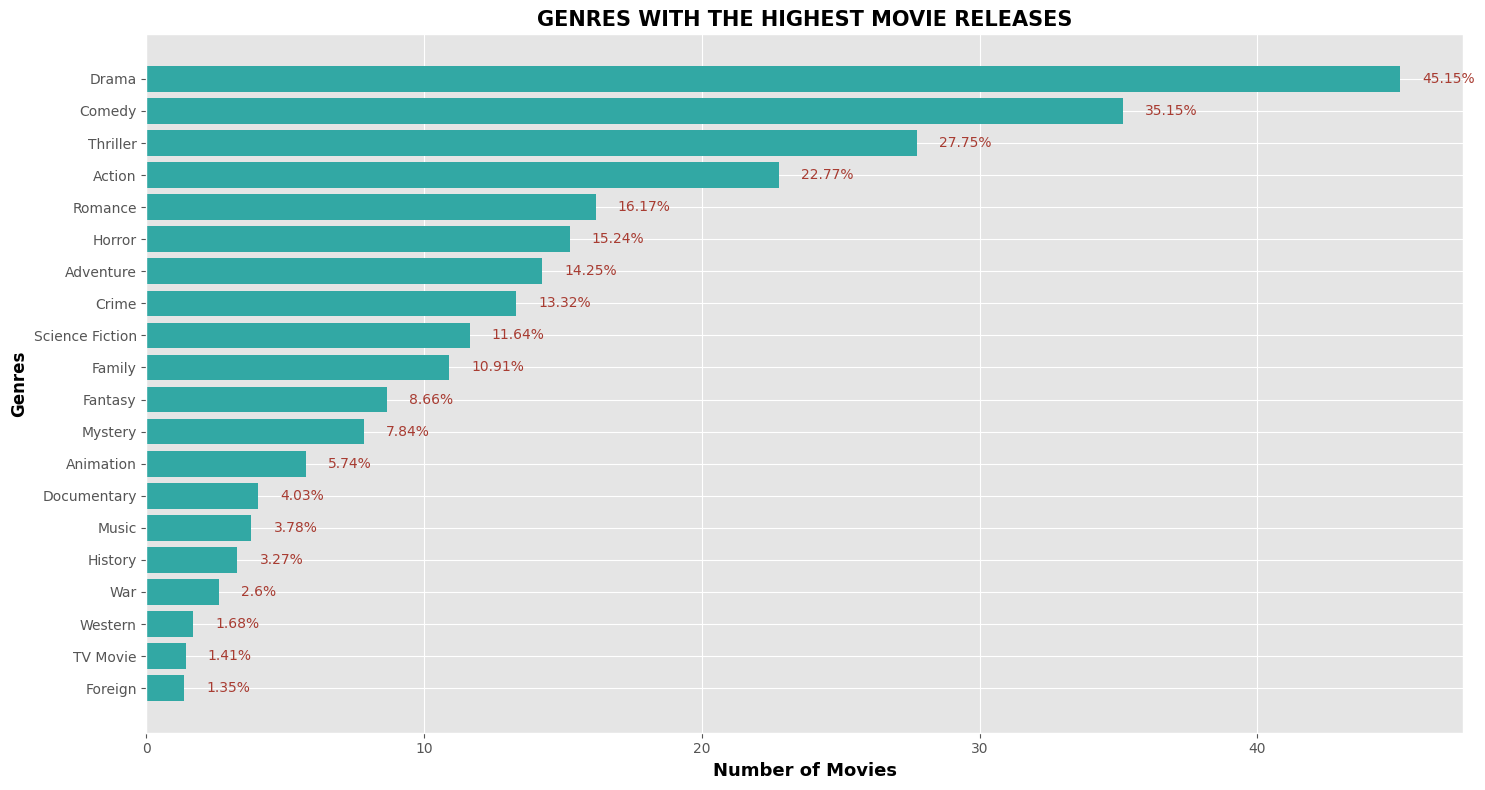

In [195]:
genres = round(data['genres'].str.split('|',expand = True).stack().value_counts()/len(data['genres']) * 100, 2)
genres.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.barh(genres.index,genres.values, color= '#32a8a4')
for index,value in enumerate(genres):
    plt.text(value +0.8,index ,str(value)+str('%'), va='center', fontsize = 10,color = '#a83c32')
plt.xlabel('Number of Movies', weight = 'bold', fontsize = 13)
plt.ylabel('Genres' , weight = 'bold', fontsize =12)
plt.title('GENRES WITH THE HIGHEST MOVIE RELEASES', weight = 'bold', fontsize= 15,)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Which 10 actors are casted the most

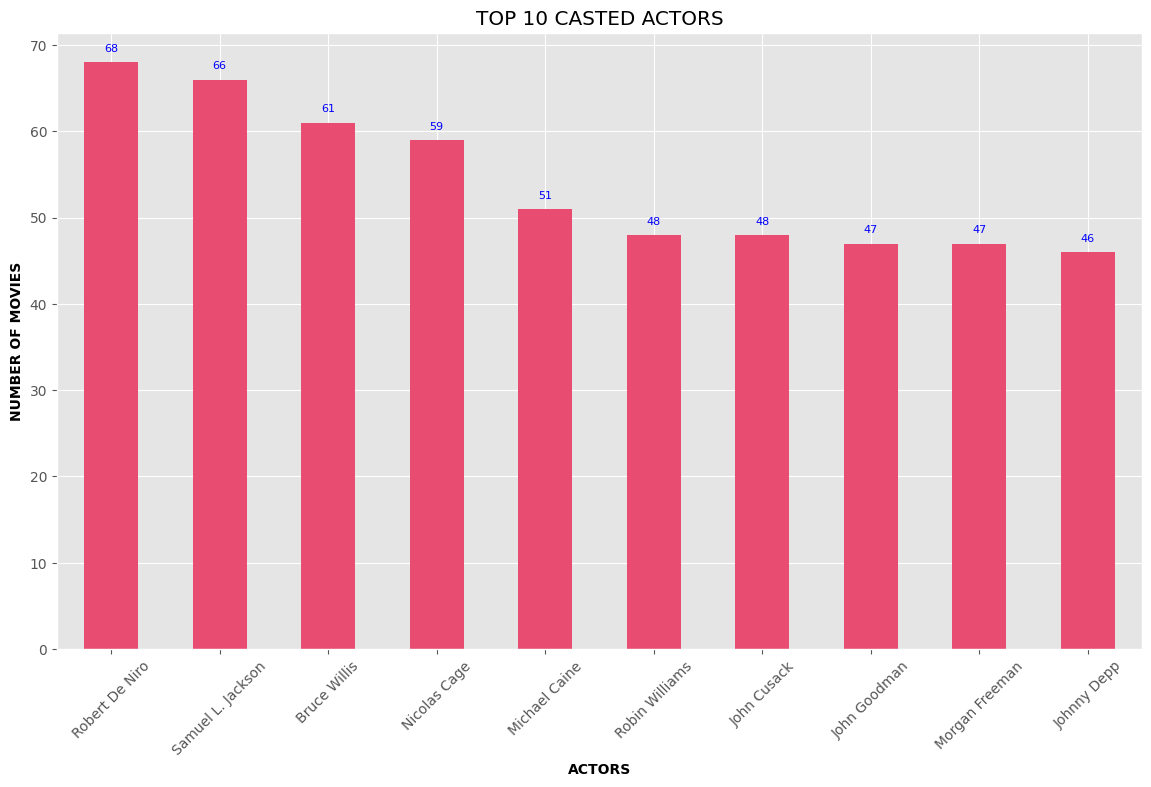

In [196]:
actors_casted = data['cast'].str.split('|',expand = True).stack().value_counts().sort_values(ascending=False)
top_actors = pd.concat([actors_casted.iloc[:10]])
plt.figure(figsize=(14,8))
ax =top_actors.plot(kind = 'bar', color= '#e84d71')
for index,value in enumerate(top_actors):
    ax.text(index,value+1 , str(value),ha = 'center', va = 'bottom', fontsize = 8, color = 'blue')
ax.set_xlabel('ACTORS', weight = 'bold')
ax.set_ylabel('NUMBER OF MOVIES', weight = 'bold')
ax.set_title('TOP 10 CASTED ACTORS')
ax.set_xticklabels(top_actors.index,rotation= 45)
plt.show()


### Identify keywords that appear frequently


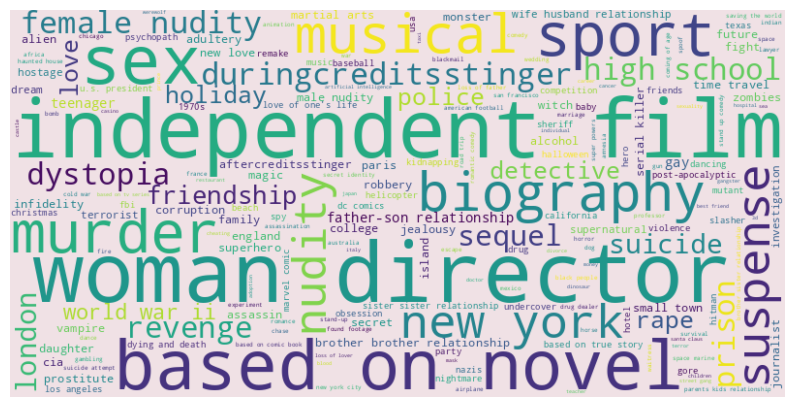

In [197]:
keywords = data['keywords'].str.split('|', expand = True).stack().value_counts()
stopwords = STOPWORDS
wordcloud = WordCloud(width=800 , height = 400, background_color= '#f0e1e5',stopwords= STOPWORDS).generate_from_frequencies(keywords)
plt.figure(figsize= (10,8))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [198]:
keywords_freq = data['keywords'].str.split('|', expand = True).stack().value_counts().sort_values(ascending = False)
keywords_freq.iloc[:20]


woman director          408
independent film        393
based on novel          278
sex                     272
sport                   215
murder                  204
musical                 169
biography               168
new york                162
suspense                159
nudity                  154
duringcreditsstinger    150
female nudity           148
prison                  140
revenge                 137
dystopia                135
high school             135
sequel                  130
london                  123
suicide                 115
dtype: int64

#### What is the average popularity of each genre

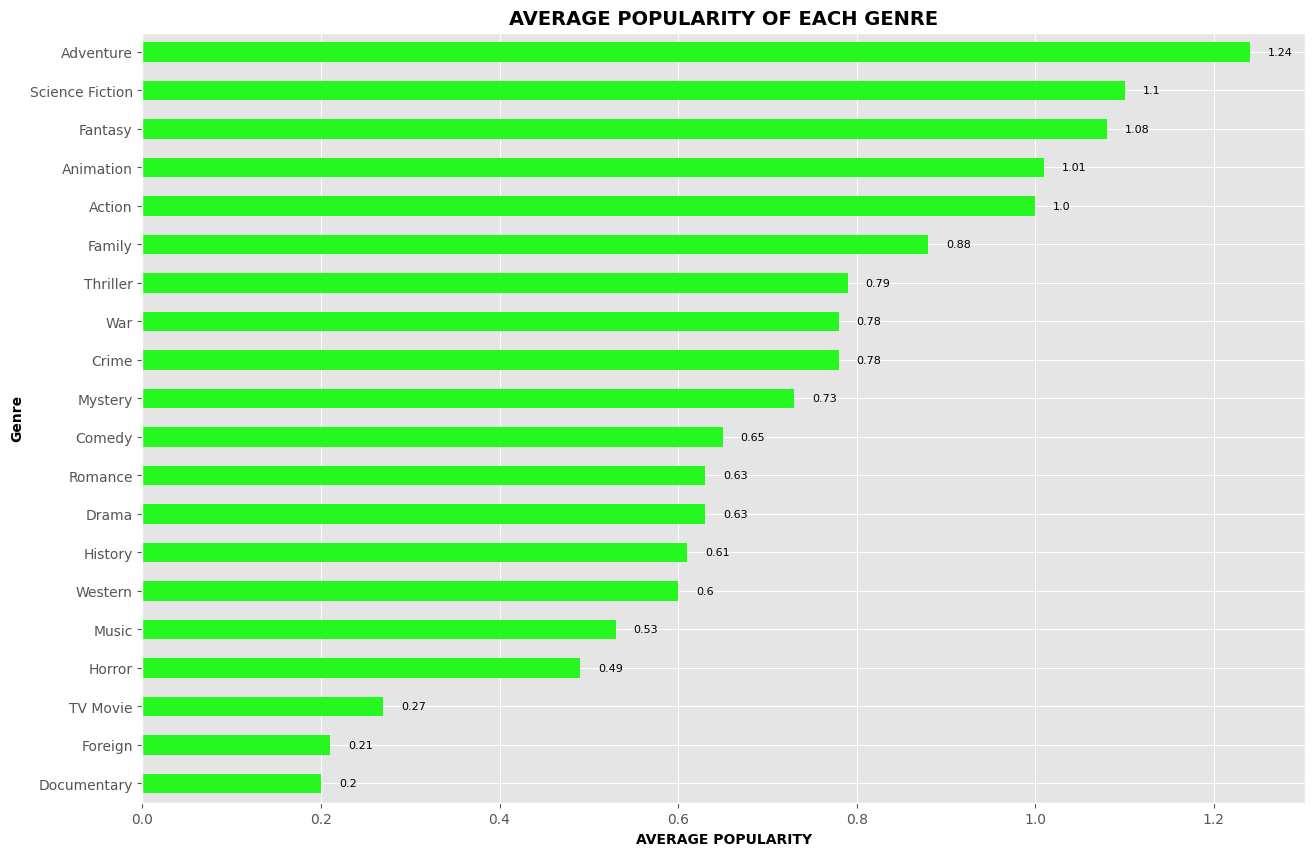

In [199]:
# splitting the genres and stacking them with a single index value
genre_df = data['genres'].str.split('|',expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
# creating a dataframe with indexes based on split values of genres
genre_split = data.drop('genres', axis = 1).join(genre_df)
genre_popularity = round(genre_split.groupby('genre')['popularity'].mean().sort_values(ascending= False),2)
genre_popularity
plt.figure(figsize =(15,10))
ax = genre_popularity.plot(kind ='barh', color = '#27f720')
for index,value in enumerate(genre_popularity):
    ax.text(value+0.02,index , str(value), va = 'center', fontsize = 8)
plt.gca().invert_yaxis()
ax.set_ylabel('Genre', weight='bold')
ax.set_xlabel('AVERAGE POPULARITY', weight = 'bold')
ax.set_title('AVERAGE POPULARITY OF EACH GENRE', weight ='bold', fontsize = 14)
plt.show()



### Calculate the total revenue of each category

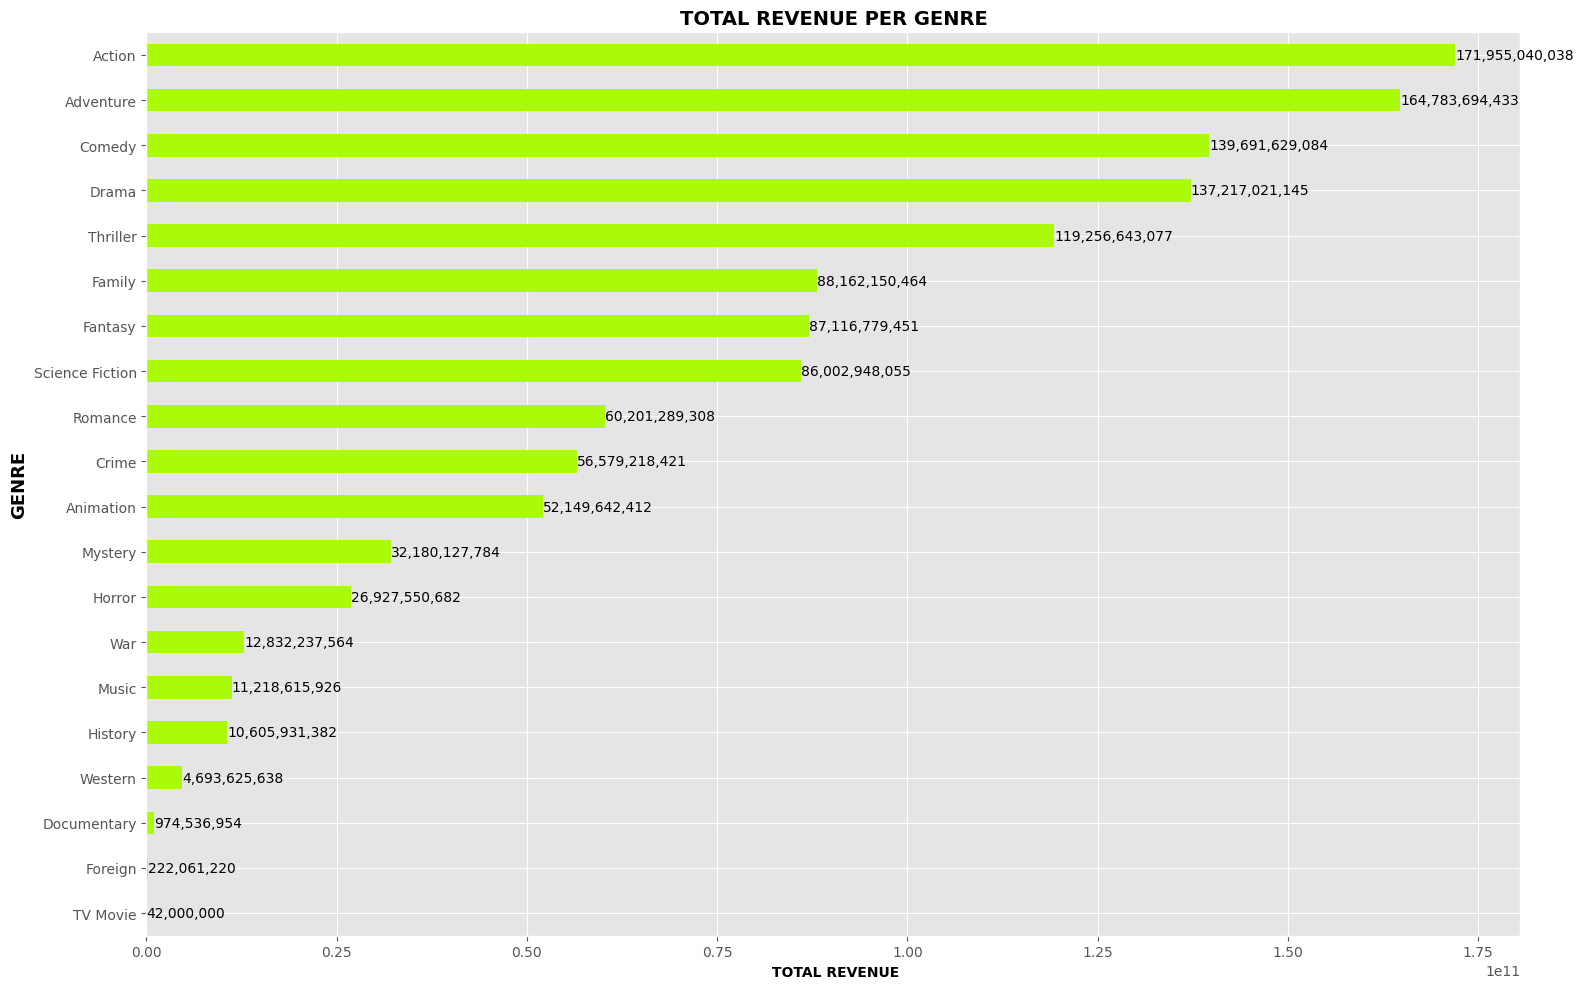

In [200]:
genre_df = data['genres'].str.split('|',expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_split = data.drop('genres', axis = 1).join(genre_df)
revenue_in_genre = genre_split.groupby('genre')['revenue'].sum().sort_values(ascending= False)
revenue_in_genre
plt.figure(figsize =(16,10))
ax = revenue_in_genre.plot(kind ='barh', color = '#aafa0a')
for index,value in enumerate(revenue_in_genre):
    ax.text(value+0.1,index ,f'{value:,}', va = 'center', fontsize = 10)
plt.gca().invert_yaxis()
ax.set_ylabel('GENRE', weight='bold', fontsize = 13)
ax.set_xlabel(' TOTAL REVENUE', weight = 'bold')
ax.set_title('TOTAL REVENUE PER GENRE', weight ='bold', fontsize = 14)
plt.tight_layout()
plt.show()


### Average vote average for movies

In [201]:
average_vote_average_before2000 = data[data['release_year']<2000]['vote_average'].mean()
print('The average vote average for movies released before 2000 is: ', average_vote_average_before2000)

The average vote average for movies released before 2000 is:  6.1104715070870705


### Visualisation of movies released over the years

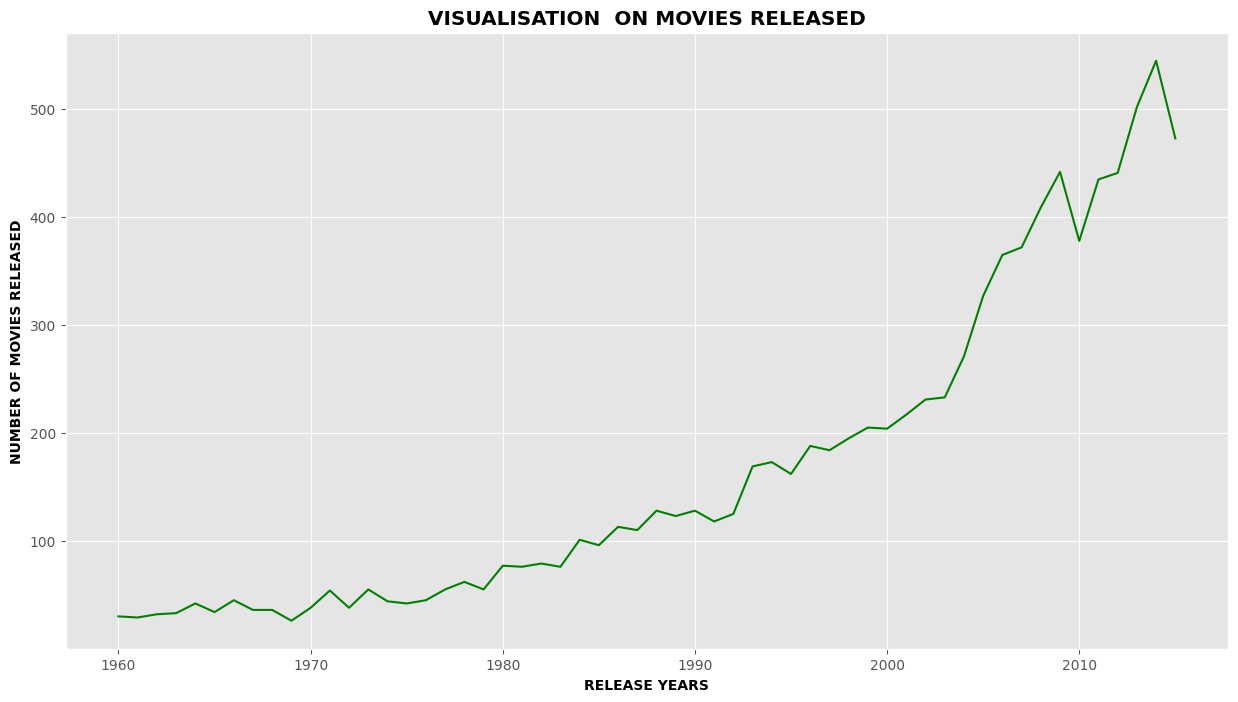

In [202]:
movies_every_year = data['release_year'].value_counts().sort_index()
plt.figure(figsize = (15,8))
plt.plot(movies_every_year.index, movies_every_year.values, color ='green')
plt.xlabel('RELEASE YEARS',weight = 'bold')
plt.ylabel('NUMBER OF MOVIES RELEASED',weight = 'bold')
plt.title('VISUALISATION  ON MOVIES RELEASED', weight = 'bold')
plt.show()

### Movie runtime analysis based on popularity

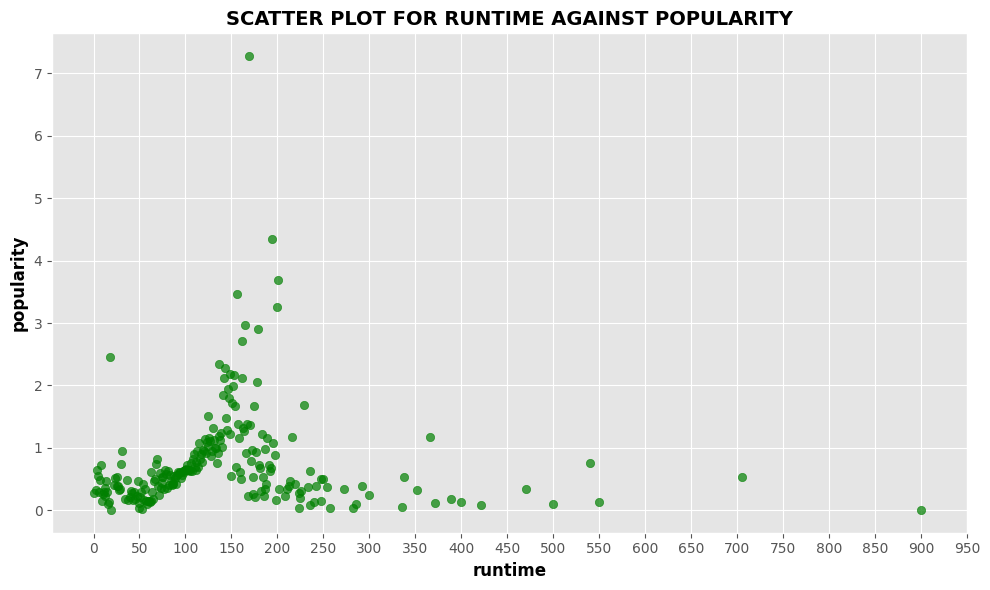

In [203]:
runtime_n_popularity = data.groupby('runtime')['popularity'].mean()
plt.figure(figsize=(10,6))
plt.scatter(runtime_n_popularity.index,runtime_n_popularity.values,alpha=0.7,marker='o', color = 'green')
plt.xlabel('runtime' , weight = 'bold', fontsize = '12')
plt.ylabel('popularity', weight = 'bold', fontsize = '12')
plt.title('SCATTER PLOT FOR RUNTIME AGAINST POPULARITY', weight = 'bold', fontsize = '14')
plt.grid(True)
plt.xticks(np.arange(0,1000,50))
plt.tight_layout()
plt.show()

### Correlation between movies released and the budget

In [204]:
correlation_matrix = data['budget'].corr(data['revenue'])
correlation_matrix

0.7322215424401477

### Correlation between average rating and revenue generated

In [205]:
correlation_btn_votes_and_revenue = data['vote_average'].corr(data['revenue'])
correlation_btn_votes_and_revenue

0.18476573333648075

### Visual representation of correlation of some of the features

C:\Users\apedo\AppData\Local\Temp\ipykernel_8976\3171234484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_of_all = data.corr()


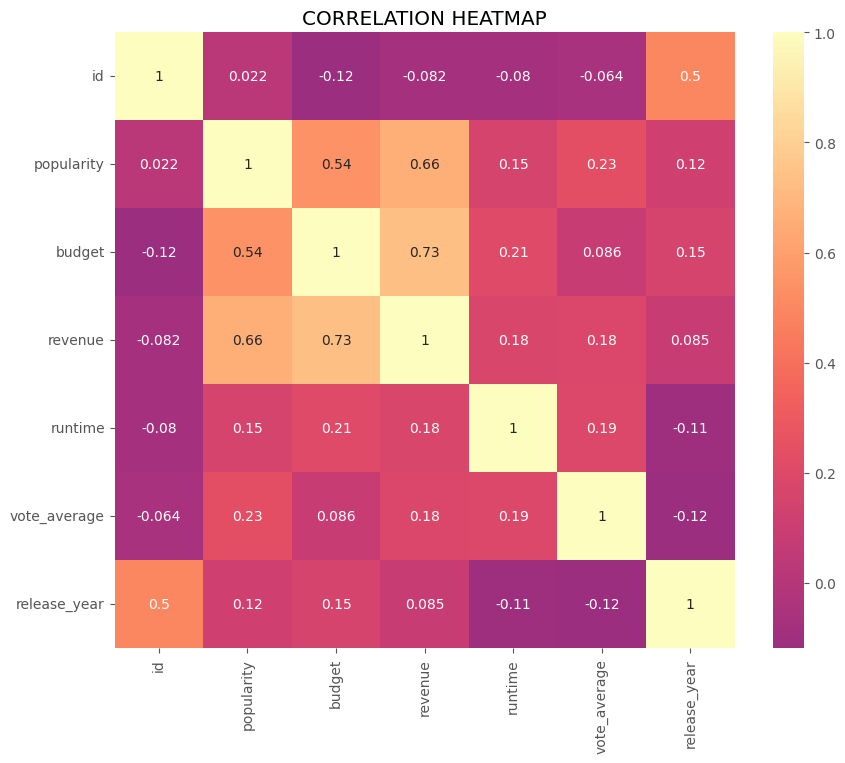

In [206]:
correlation_of_all = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_of_all,annot=True,cmap='magma', center = 0)
plt.title('CORRELATION HEATMAP')
plt.show()

## CONCLUSION